In [ ]:
!pip install top2vec==1.0.6

In [42]:
import pandas as pd
import pandas.io.sql as psql
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import spacy
from spacy import displacy
from spacy.lang.pt.stop_words import STOP_WORDS
from nltk.stem import RSLPStemmer
import re
from string import punctuation
from unicodedata import normalize 
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [1]:
import numpy as np 
import pandas as pd 
import json
import os
from top2vec import Top2Vec

In [170]:
df = pd.read_csv('tweets2020.csv', sep = '|', encoding = 'utf-8')

In [171]:
df.count()

Distribuidora    7133
Unnamed: 1       7133
Original         7133
Regex            6979
Date             7133
dtype: int64

In [172]:
df = df[df['Distribuidora']=='Light']
df.head()

,Distribuidora,Unnamed: 1,Original,Regex,Date
4099,Light,1,@lightclientes tá de sacanagem?,tá de sacanagem?,2021-02-04 22:41:26
4100,Light,2,não pode dar 2 min de chuva que a luz cai e de...,não pode dar 2 min de chuva que a luz cai e de...,2021-02-04 22:40:22
4101,Light,3,@lightclientes falta de luz no São Bento,falta de luz no São Bento,2021-02-04 22:39:38
4102,Light,4,"@ANEEL_govbr Enquanto uns tem luz, outros estã...","Enquanto uns tem luz, outros estão com o relóg...",2021-02-04 22:39:26
4103,Light,5,"@lightclientes, estou desde 02/02 com problema...",estou desde 02/02 com problema em minha residê...,2021-02-04 22:38:59


In [173]:
df['Data'] = pd.to_datetime(df['Date'], infer_datetime_format=True)  
df.dtypes

Distribuidora            object
Unnamed: 1                int64
Original                 object
Regex                    object
Date                     object
Data             datetime64[ns]
dtype: object

In [174]:
df['Hora']=df['Data'].dt.hour
df['Dia']=df['Data'].dt.day

In [175]:
dfhora1 = df[(df['Dia']==30) & (df['Hora']==1)]
dfhora1.count()
dfhora2 = df[(df['Dia']==30) & (df['Hora']==2)]
dfhora2.count()

Distribuidora    213
Unnamed: 1       213
Original         213
Regex            204
Date             213
Data             213
Hora             213
Dia              213
dtype: int64

In [198]:
# df1 = dfhora1.dropna()
# df2 = dfhora2.dropna()
df3 = df1.append(df2)

In [180]:
pln = spacy.load('pt_core_news_sm')
lista = ['consumidor','Consumidor','consumidora','Consumidora','Distribuidora','distribuidora','relata','manteve','contato','solicita','solicitou',\
         'solicitado','solicitação','orientado','orientada','número','protocolo','registrou','registrado','transcreve','resposta']
punc = string.punctuation
stopwords = nltk.corpus.stopwords.words('portuguese') + list(punc)
ps = nltk.stem.RSLPStemmer()

In [181]:
padraodata1 = '[0-9]{1,2}[\/\.\-][0-9]{1,2}([\/\.\-][0-9]{2,4})?'
padraodata2 = '[0-9]{1,2}(\s*de\s*((jane?i?r?o?)|(feve?r?e?i?r?o?)|(març?c?o?)|(abri?l?)|(maio?)|(junh?o?)|(julh?o?)|(agos?t?o?)|(sete?m?b?r?o?)|(outu?b?r?o?)|(nove?m?b?r?o?)|(deze?m?b?r?o?))(\s*(de)?\s*[0-9]{2,4})?)'
padraodata3 = 'dia\s([0-9]{1,2})'
padraodata4 = '((janeiro)|(fevereiro)|(març?c?o)|(abril)|(maio)|(junho)|(julho)|(agosto)|(setembro)|(outubro)|(novembro)|(dezembro))\s*(de)?([0-9]{2,4})?'
padraohora = '([0-9]{1,2}((hr?s?)|(\s*horas?)|(\s+hrs)|(\s+hr)|(\s+hs))\s*e?\s*(([0-9]{0,2}\s*((m)|(min)|(mn)|(minutos?))?)?\s*(da)?\s*((manha)|(manhã)|(tarde)|(noite))?)?)|([0-9]{1,2}\s*da\s*((manha)|(manhã)|(tarde)|(noite)))'
padraocpf = 'cpf\s+[0-9]{3}[\.\/\-\s*]*[0-9]{3}[\.\/\-\s*]*[0-9]{3}[\.\/\-\s*]*[0-9]{2}'
padraocep = 'cep\s+[0-9]{2}[\.\/\-\s*]*[0-9]{3}[\.\/\-\s*]*[0-9]{3}'
padraoprotocolo1 = '(((protocolo)|(processo)|(proc)|(prot)|(ordem)|(solicitação)|(solicitacao)|(solicitaçao)|(solicitacão))\s*)(((de)|(com))\s*)*(((numero)|(número)|(nº)|(n°)|(n))\s*\:*\s*)?[0-9]+'
padraoprotocolo2 = '((numero)|(número)|(nº)|(n°)|(n))\s*[0-9]+'
padraodistribuidora = r'\s((cea)|(ess)|((permissionárias[\s\-\/\\])?arsesp)|(cooperaliança)|((permissionária[\s\-\/\\])?agergs)|(cetril)|(coprel)|(cerej)|(cerim)|(cerpalo)|(ceripa)|(ceres)|(equatorial([\s\-\/\\]al)?)|(ceral([\s\-\/\\]araruama)?)|(ebo)|(celpe)|(cemar)|(equatorial([\s\-\/\\]pi)?)|(coelba)|(enel([\s\-\/\\]ce)?)|(cosern)|(ese)|(eletroacre)|(epb)|(sulgipe)|(ceb)|(celg)|(emt)|(chesp)|(ems)|(rge([\s\-\/\\]sul)?)|(eletrocar)|(ceam)|(ceee)|(celesc)|(copel)|(forcel)|(demei)|(efljc)|(uhenpal)|(hidropan)|(equatorial([\s\-\/\\]pa)?)|(eflul)|(putinga)|(cocel)|(cemig)|(emg)|(enf)|(eto)|(enel([\s\-\/\\]rj)?)|(edp([\s\-\/\\]sp)?)|(cpfl([\s\-\/\\]paulista)?)|(edp([\s\-\/\\]es)?)|(light)|(dmed)|(cpfl([\s\-\/\\]((santa\scruz)|(sul\spaulista)|(mococa)|(jaguari)|(leste paulista)|(piratininga)))?)|(elfsm)|(cerr)|(cflo)|(eeb)|(eevp)|(cnee)|(elektro)|(furnas)|(ceron)|(eletropaulo)|(ame)|(mmc)|(ienergia)|(aneel)|(outros)|(permissionárias\-aneel)|(gce)|(elektro[\s\-\/\\]?ms))\s'
padraoresto = '[0-9]+'

In [182]:
def normalizacao(text):
    r1 = re.sub(padraoprotocolo1, '_protoc_', text)
    r2 = re.sub(padraoprotocolo2, '_protoc_', r1)
    r3 = re.sub(padraocpf, '_cpf_', r2)
    r4 = re.sub(padraocep, '_cep_', r3)
    r5 = re.sub(padraohora, '_hour_', r4)
    r6 = re.sub(padraodata1, '_date_', r5)
    r7 = re.sub(padraodata2, '_date_', r6)
    r8 = re.sub(padraodata3, '_date_', r7)
    r9 = re.sub(padraodata4, '_date_', r8)
    r10 = re.sub(padraodistribuidora, '_distribuidora_', r9)
    r11 = re.sub(padraoresto, '_valornumerico_', r10)
    return r11

In [183]:
def preprocessing(text):
    texto = text.lower()
    norm = normalizacao(text)
    texto = norm.replace('\r', ' ').replace('\n', ' ').replace('\t', ' ')
    documento = pln(texto)
    lemma = []
    stem = []
    for token in documento:
        lemma.append(token.lemma_)
        stem.append(str(token))
    lemma = [palavra for palavra in lemma if palavra not in stopwords and palavra.isalpha() and len(palavra)>2]
    lemma = ' '.join([str(elemento) for elemento in lemma])
    lemma = re.sub(r'\s{2,}', ' ', lemma)
    stem = ' '.join([ps.stem(word) for word in stem if word not in stopwords and word.isalpha() and len(word)>2])
    return lemma

In [184]:
def preprocessar(text):
    texto = text.lower()
#     norm = normalizacao(text)
#     texto = norm.replace('\r', ' ').replace('\n', ' ').replace('\t', ' ')
    documento = pln(texto)
    lemma = []
    for token in documento:
        lemma.append(token.lemma_)
    lemma = [palavra for palavra in lemma if palavra not in stopwords and palavra.isalpha() and len(palavra)>2]
    lemma = ' '.join([str(elemento) for elemento in lemma])
#     lemma = re.sub(r'\s{2,}', ' ', lemma)
    return lemma

In [200]:
df1['Temporario'] = df1['Regex'].apply(lambda x: preprocessar(x.lower()))
df2['Temporario'] = df2['Regex'].apply(lambda x: preprocessar(x.lower()))
df3['Temporario'] = df3['Regex'].apply(lambda x: preprocessar(x.lower()))

In [201]:
df3.count()

Distribuidora    477
Unnamed: 1       477
Original         477
Regex            477
Date             477
Data             477
Hora             477
Dia              477
Temporario       477
dtype: int64

In [202]:
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()

In [206]:
df1['Regex'] = df1['Regex'].str.lower() 
df2['Regex'] = df2['Regex'].str.lower() 
df3['Regex'] = df3['Regex'].str.lower() 

In [207]:
model1 = Top2Vec(documents=df1['Regex'])
model2 = Top2Vec(documents=df2['Regex'])
model3 = Top2Vec(documents=df3['Regex'])

In [208]:
num1 = model1.get_num_topics()
print('modelo 1:',num1)
num2 = model2.get_num_topics()
print('modelo 2:',num2)
num3 = model3.get_num_topics()
print('modelo 3:',num3)

modelo 1: 2
modelo 2: 2
modelo 3: 2


In [209]:
topic_words, word_scores, topic_nums = model1.get_topics(num1)

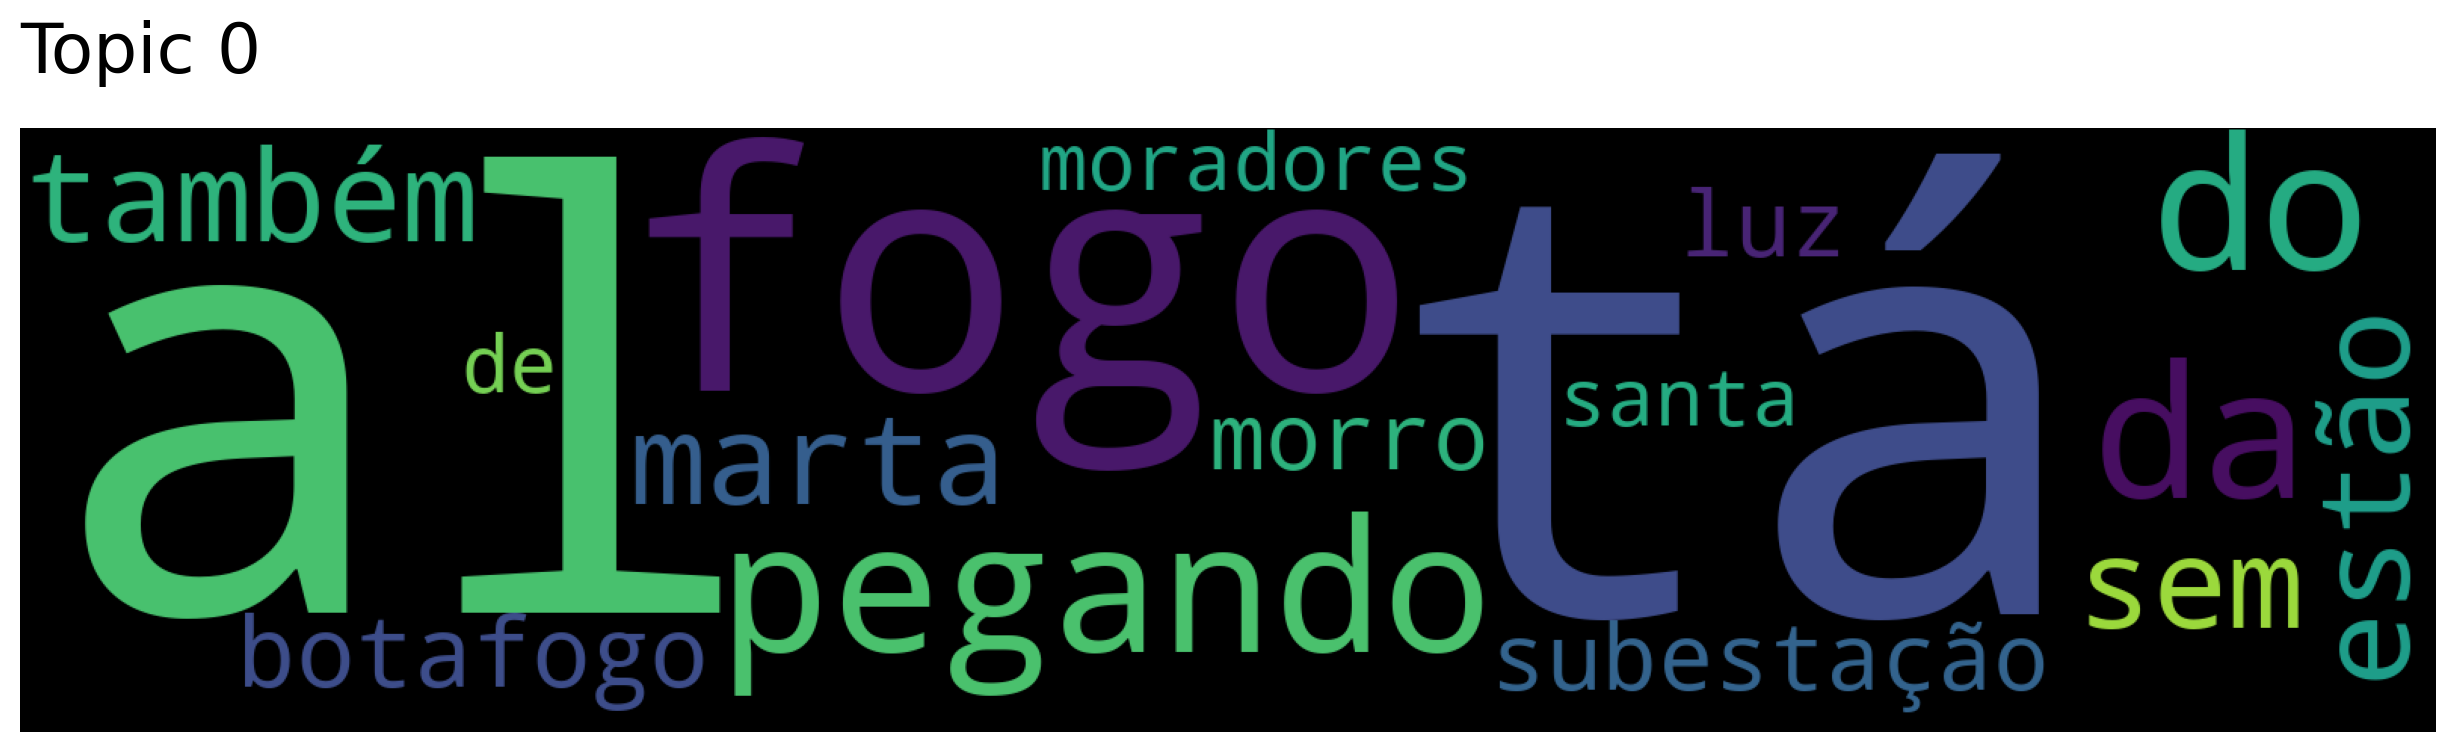

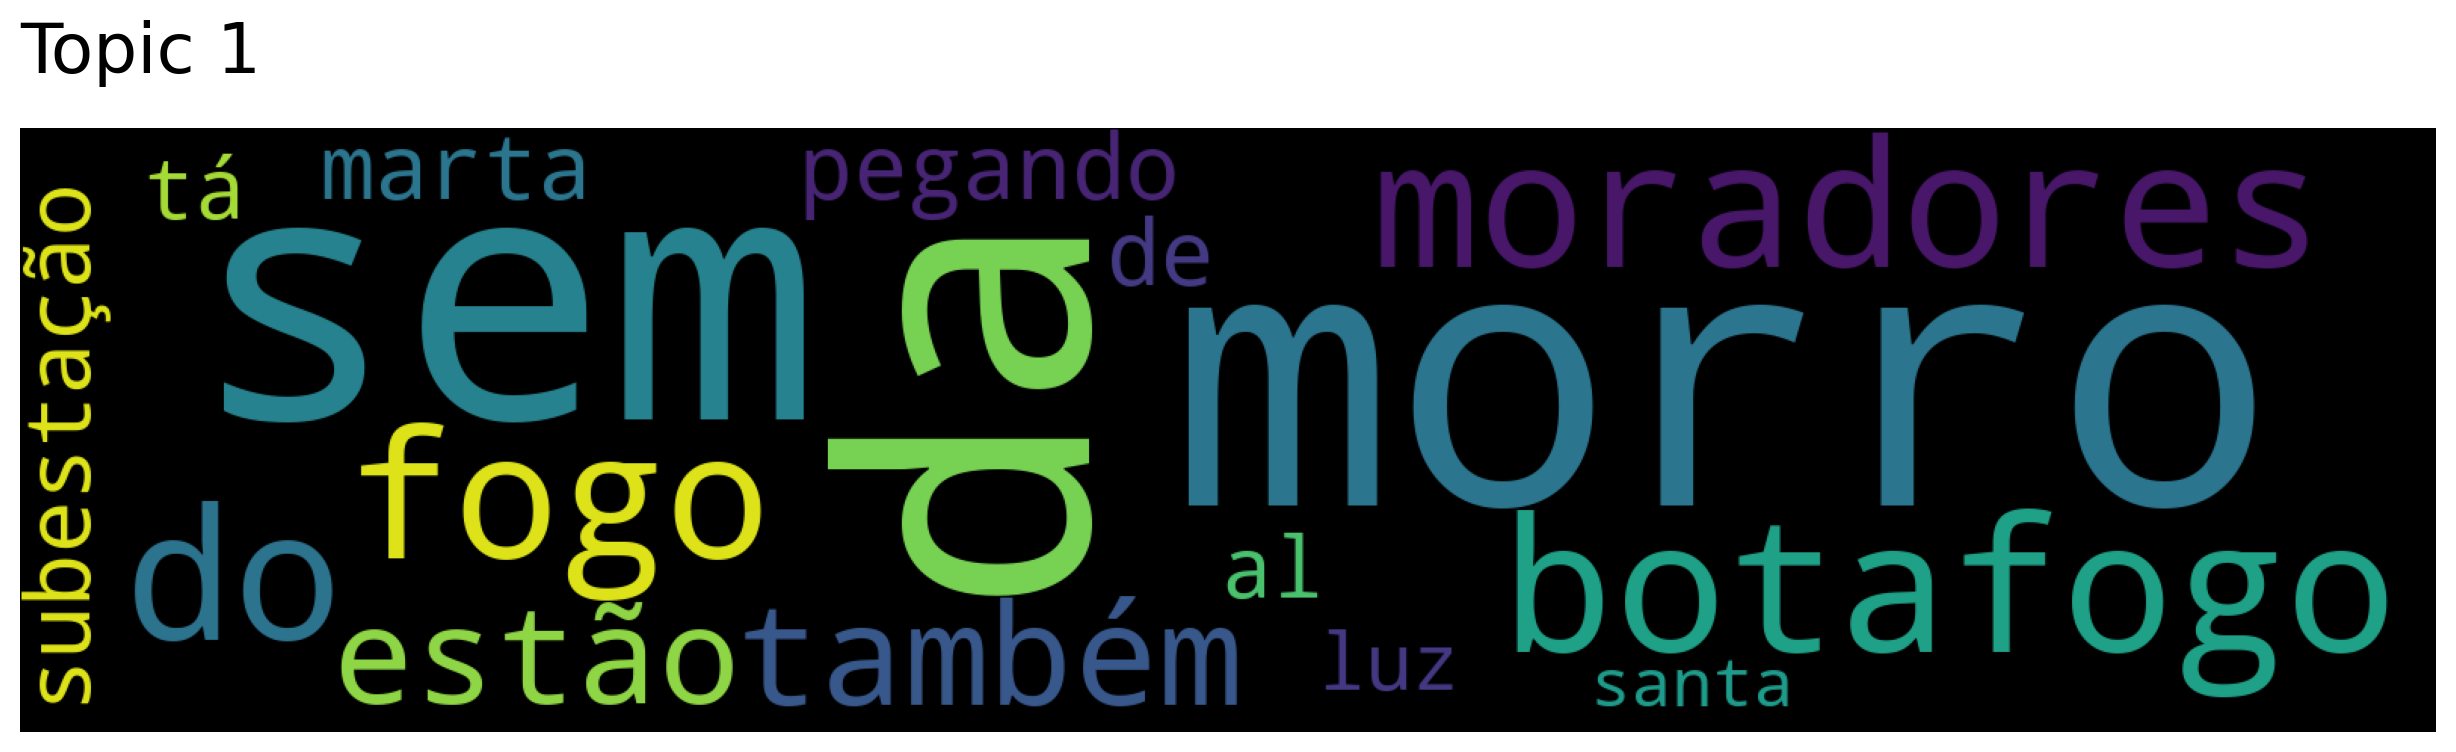

In [210]:
for topic in topic_nums[0:num1]:
    model1.generate_topic_wordcloud(topic, background_color="black")

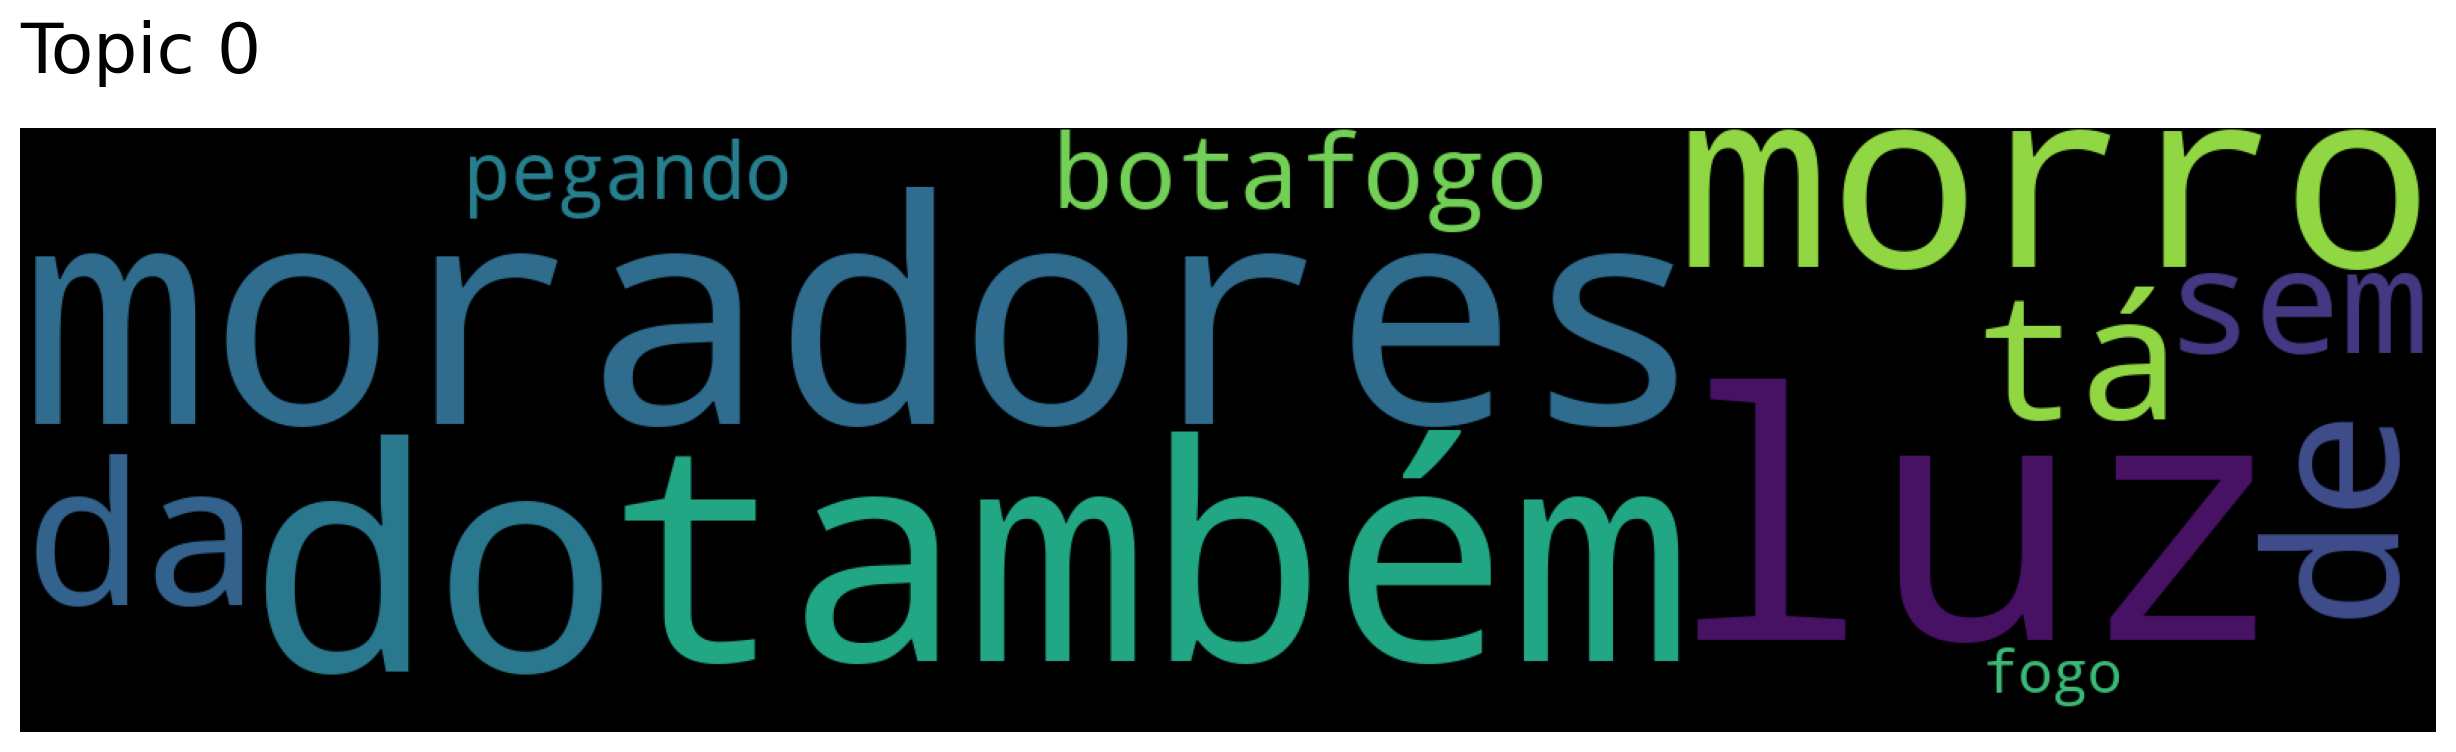

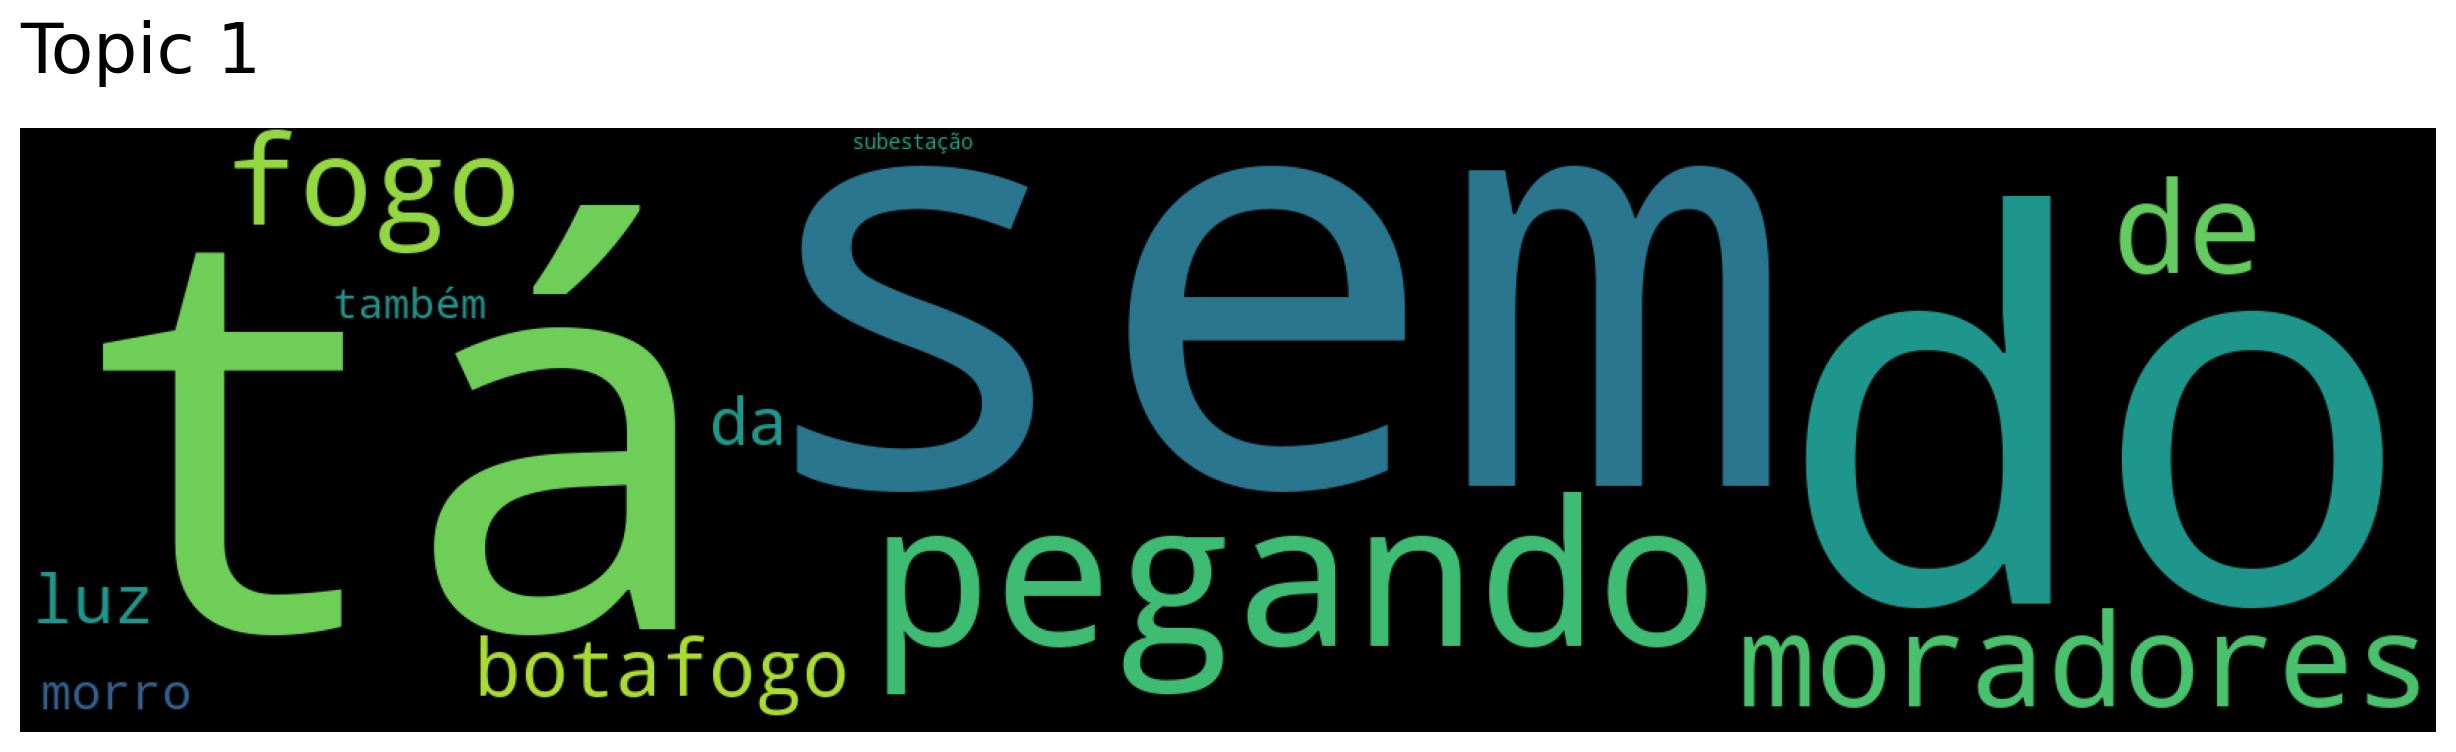

In [211]:
topic_words, word_scores, topic_nums = model2.get_topics(num2)
for topic in topic_nums[0:num2]:
    model2.generate_topic_wordcloud(topic, background_color="black")

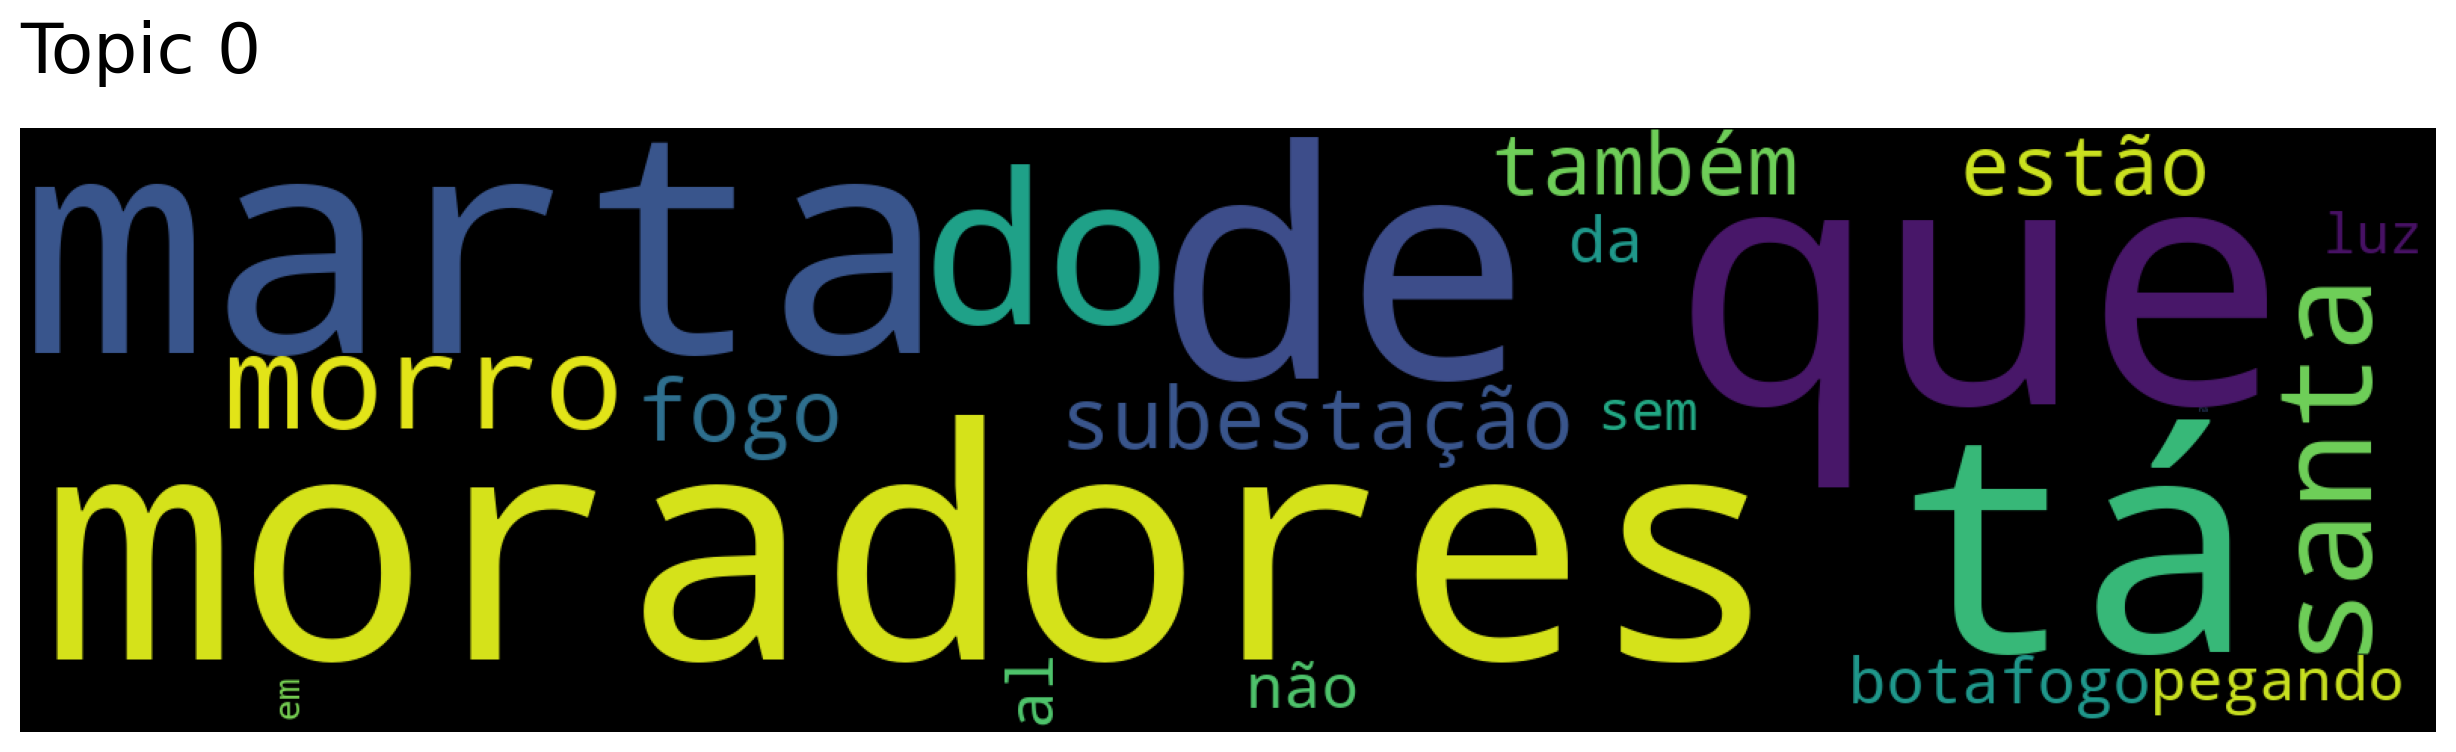

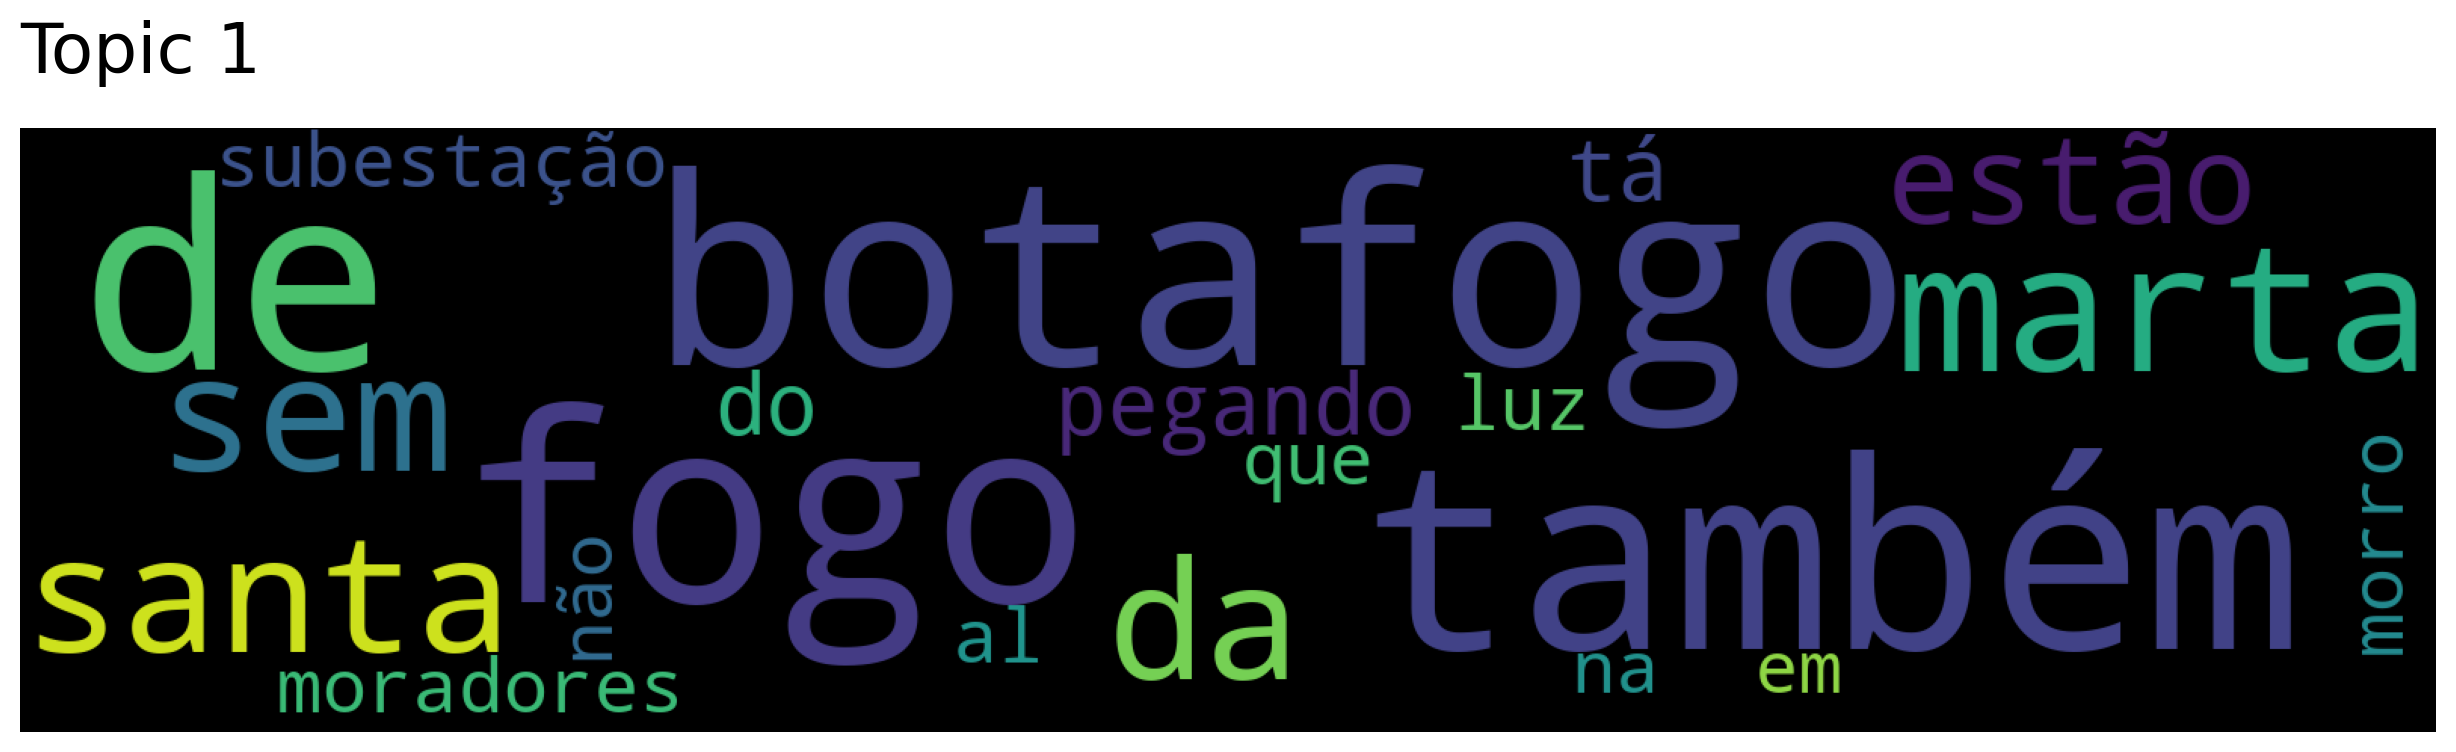

In [212]:
topic_words, word_scores, topic_nums = model3.get_topics(num3)
for topic in topic_nums[0:num3]:
    model3.generate_topic_wordcloud(topic, background_color="black")

In [107]:
topic_words

[['al',
  'tá',
  'fogo',
  'pegando',
  'do',
  'da',
  'também',
  'estão',
  'marta',
  'sem',
  'botafogo',
  'subestação',
  'morro',
  'luz',
  'de',
  'santa',
  'moradores'],
 ['sem',
  'morro',
  'da',
  'de',
  'marta',
  'do',
  'moradores',
  'subestação',
  'botafogo',
  'tá',
  'também',
  'fogo',
  'pegando',
  'estão',
  'al',
  'luz',
  'santa']]

In [108]:
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [225]:
count_vectorizer = CountVectorizer(decode_error='ignore',min_df=2,max_df=50000) 
Xt = count_vectorizer.fit_transform(df1['Temporario'])
t_feature_names = count_vectorizer.get_feature_names()
# for i in range(20):
#     lda = LatentDirichletAllocation(n_components=i+1, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(Xt)
#     print(i+1)
#     print('Perplexity ', i+1, lda.bound_)

In [226]:
from sklearn.decomposition import LatentDirichletAllocation

no_topics = 2

# LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', \
                                learning_offset=50.,random_state=0).fit(Xt)


In [227]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
no_top_words = 20       
print('LDA')
display_topics(lda, t_feature_names, no_top_words)

LDA
Topic 0:
luzir calor aqui ser ter noite fazer bom algum ficar coisa ver porra parir vcs casar acabar pelar novo ninguém
Topic 1:
luzir botafogo estar fogo pegar subestação morrer marta santo morador novo humaitá humaita calor falto janeiro ruir light ano bom


In [228]:
count_vectorizer = CountVectorizer(decode_error='ignore',min_df=2) 
Xt = count_vectorizer.fit_transform(df2['Temporario'])
t_feature_names = count_vectorizer.get_feature_names()
no_topics = 2

# LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', \
                                learning_offset=50.,random_state=0).fit(Xt)
no_top_words = 20       
print('LDA')
display_topics(lda, t_feature_names, no_top_words)

LDA
Topic 0:
luzir ser voltar dia aqui light pelar ter morar ainda ruir pois poder falto umar coisa acabar fazer parir dormir
Topic 1:
botafogo fogo estar luzir pegar subestação morador morrer marta santo humaitá ser agora dois dever energia tudo apagar instalação incêndio


In [229]:
count_vectorizer = CountVectorizer(decode_error='ignore',min_df=2) 
Xt = count_vectorizer.fit_transform(df3['Temporario'])
t_feature_names = count_vectorizer.get_feature_names()
no_topics = 2

# LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', \
                                learning_offset=50.,random_state=0).fit(Xt)
no_top_words = 20       
print('LDA')
display_topics(lda, t_feature_names, no_top_words)

LDA
Topic 0:
ser luzir humaitá aqui calor voltar ter energia agora dia tudo botafogo dois pelar parir incêndio dever light instalação falto
Topic 1:
luzir botafogo fogo estar pegar subestação morador morrer marta santo ruir pinheiro guimarães sant rir humaitá janeiro falto bom calor
